<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

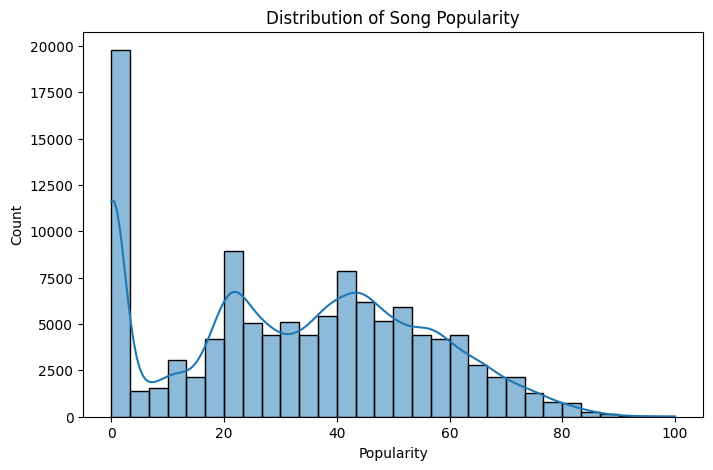

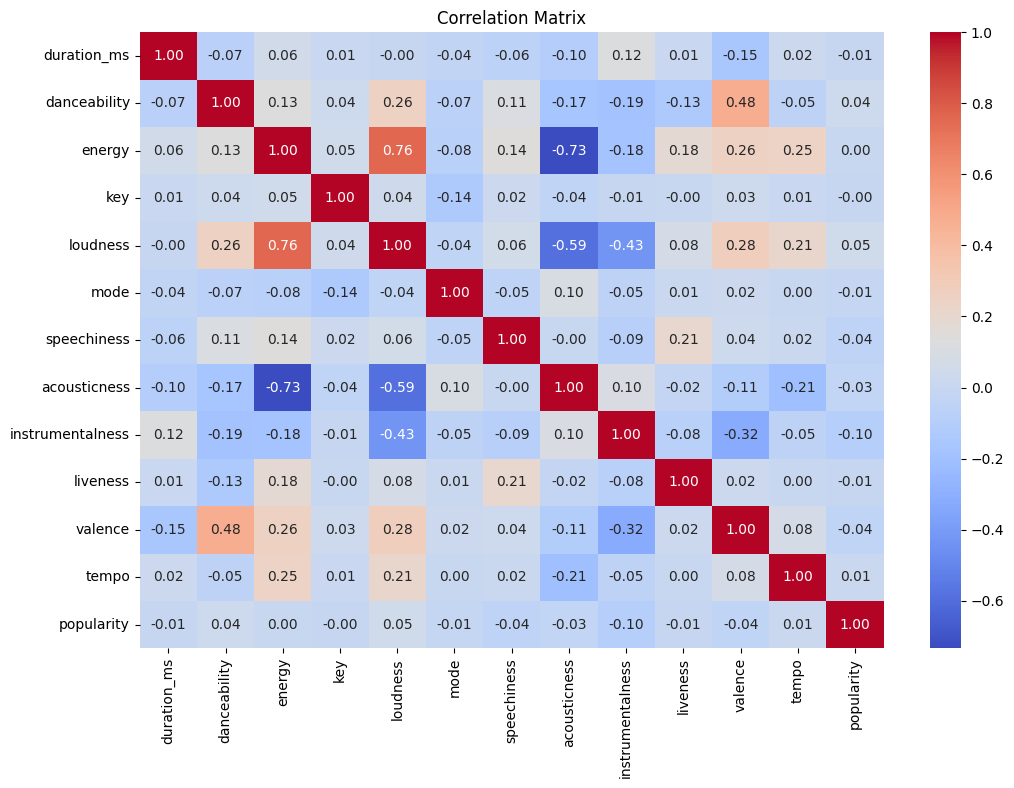

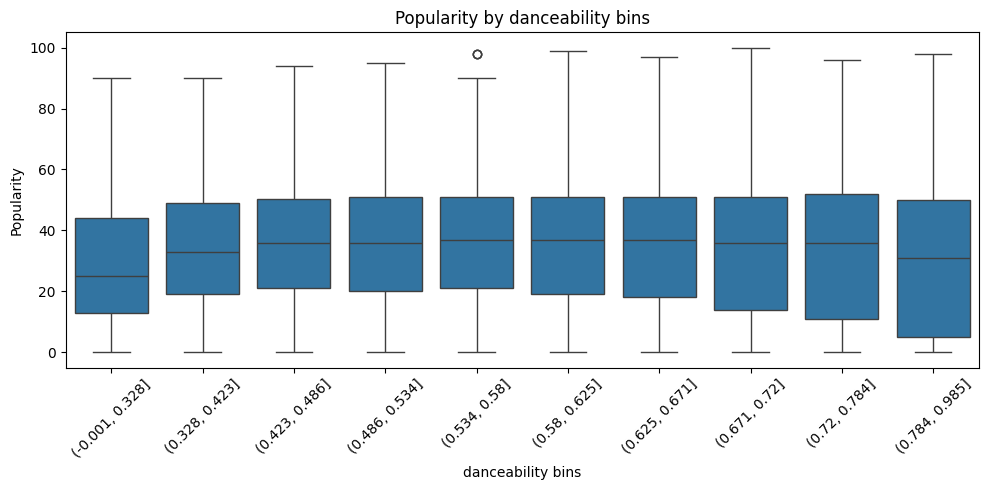

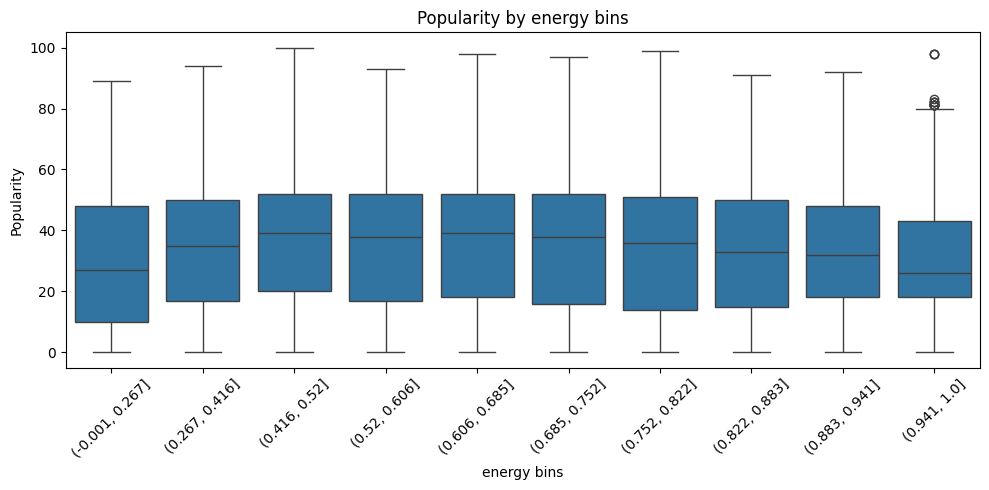

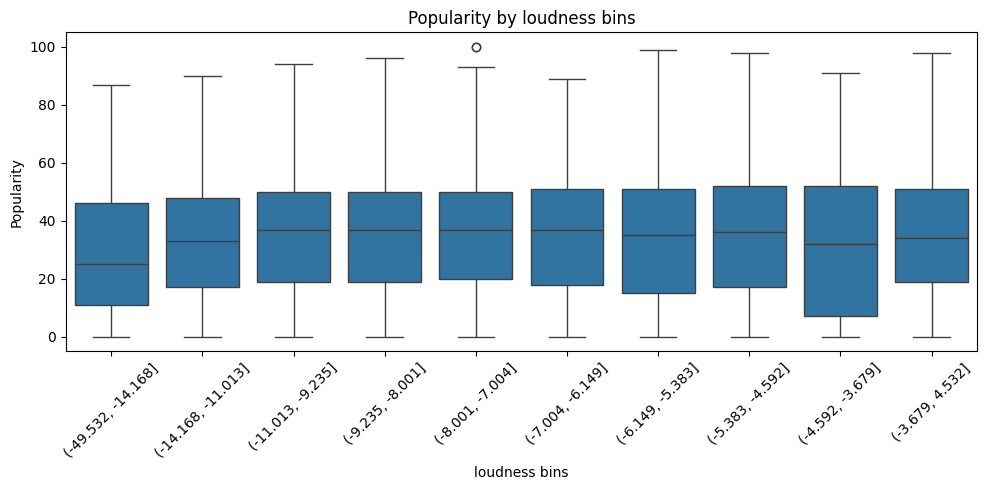

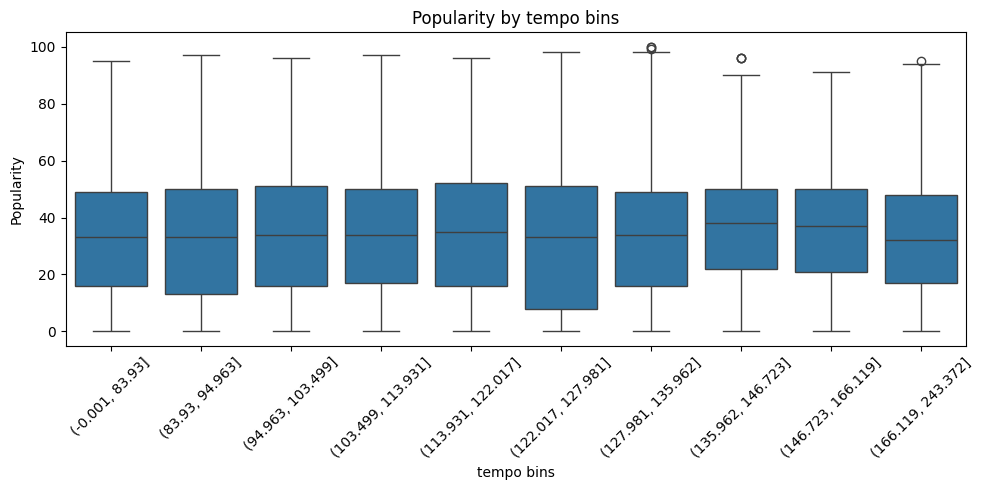

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
trance         1000
trip-hop       1000
turkish        1000
world-music    1000
Name: count, Length: 114, dtype: int64
Linear Regression RMSE: 19.11
Linear Regression R2: 0.26
Decision Tree RMSE: 20.00
Decision Tree R2: 0.19
XGBoost RMSE: 17.26
XGBoost R2: 0.40
Epoch 1/100


C:\Users\Myth\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 572.1288 - val_loss: 368.1549
Epoch 2/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - loss: 361.5406 - val_loss: 365.2542
Epoch 3/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 360.5757 - val_loss: 359.1515
Epoch 4/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 983us/step - loss: 352.3239 - val_loss: 356.9850
Epoch 5/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 344.2951 - val_loss: 357.2694
Epoch 6/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 347.6403 - val_loss: 351.3964
Epoch 7/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 340.4812 - val_loss: 350.5191
Epoch 8/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 337.7667 - val_loss: 351.2830
Epoch 9/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 330.3245 - val_loss: 352.5999
Epoch 10/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 326.4370 - val_loss: 345.2363
Epoch 11/100
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 327.8645 - va

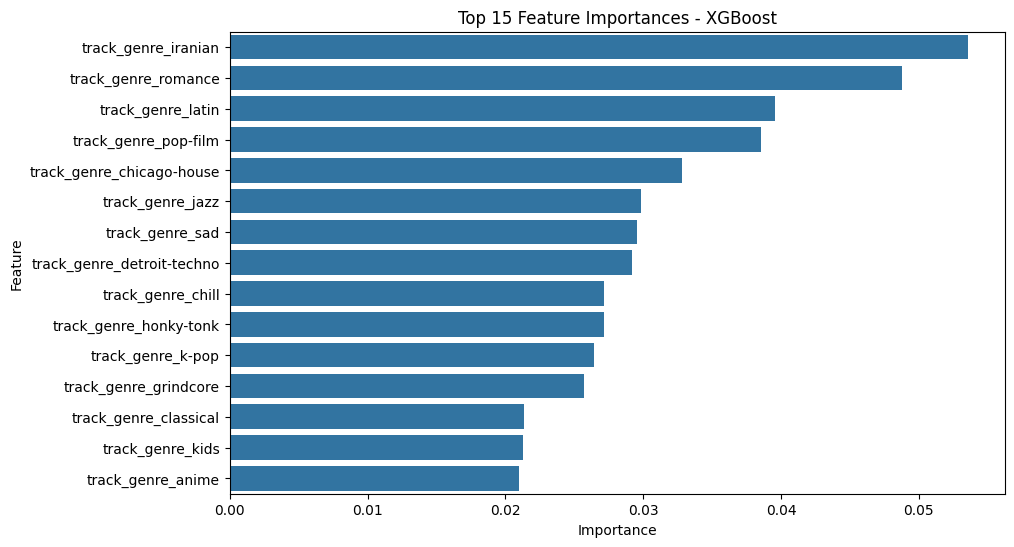

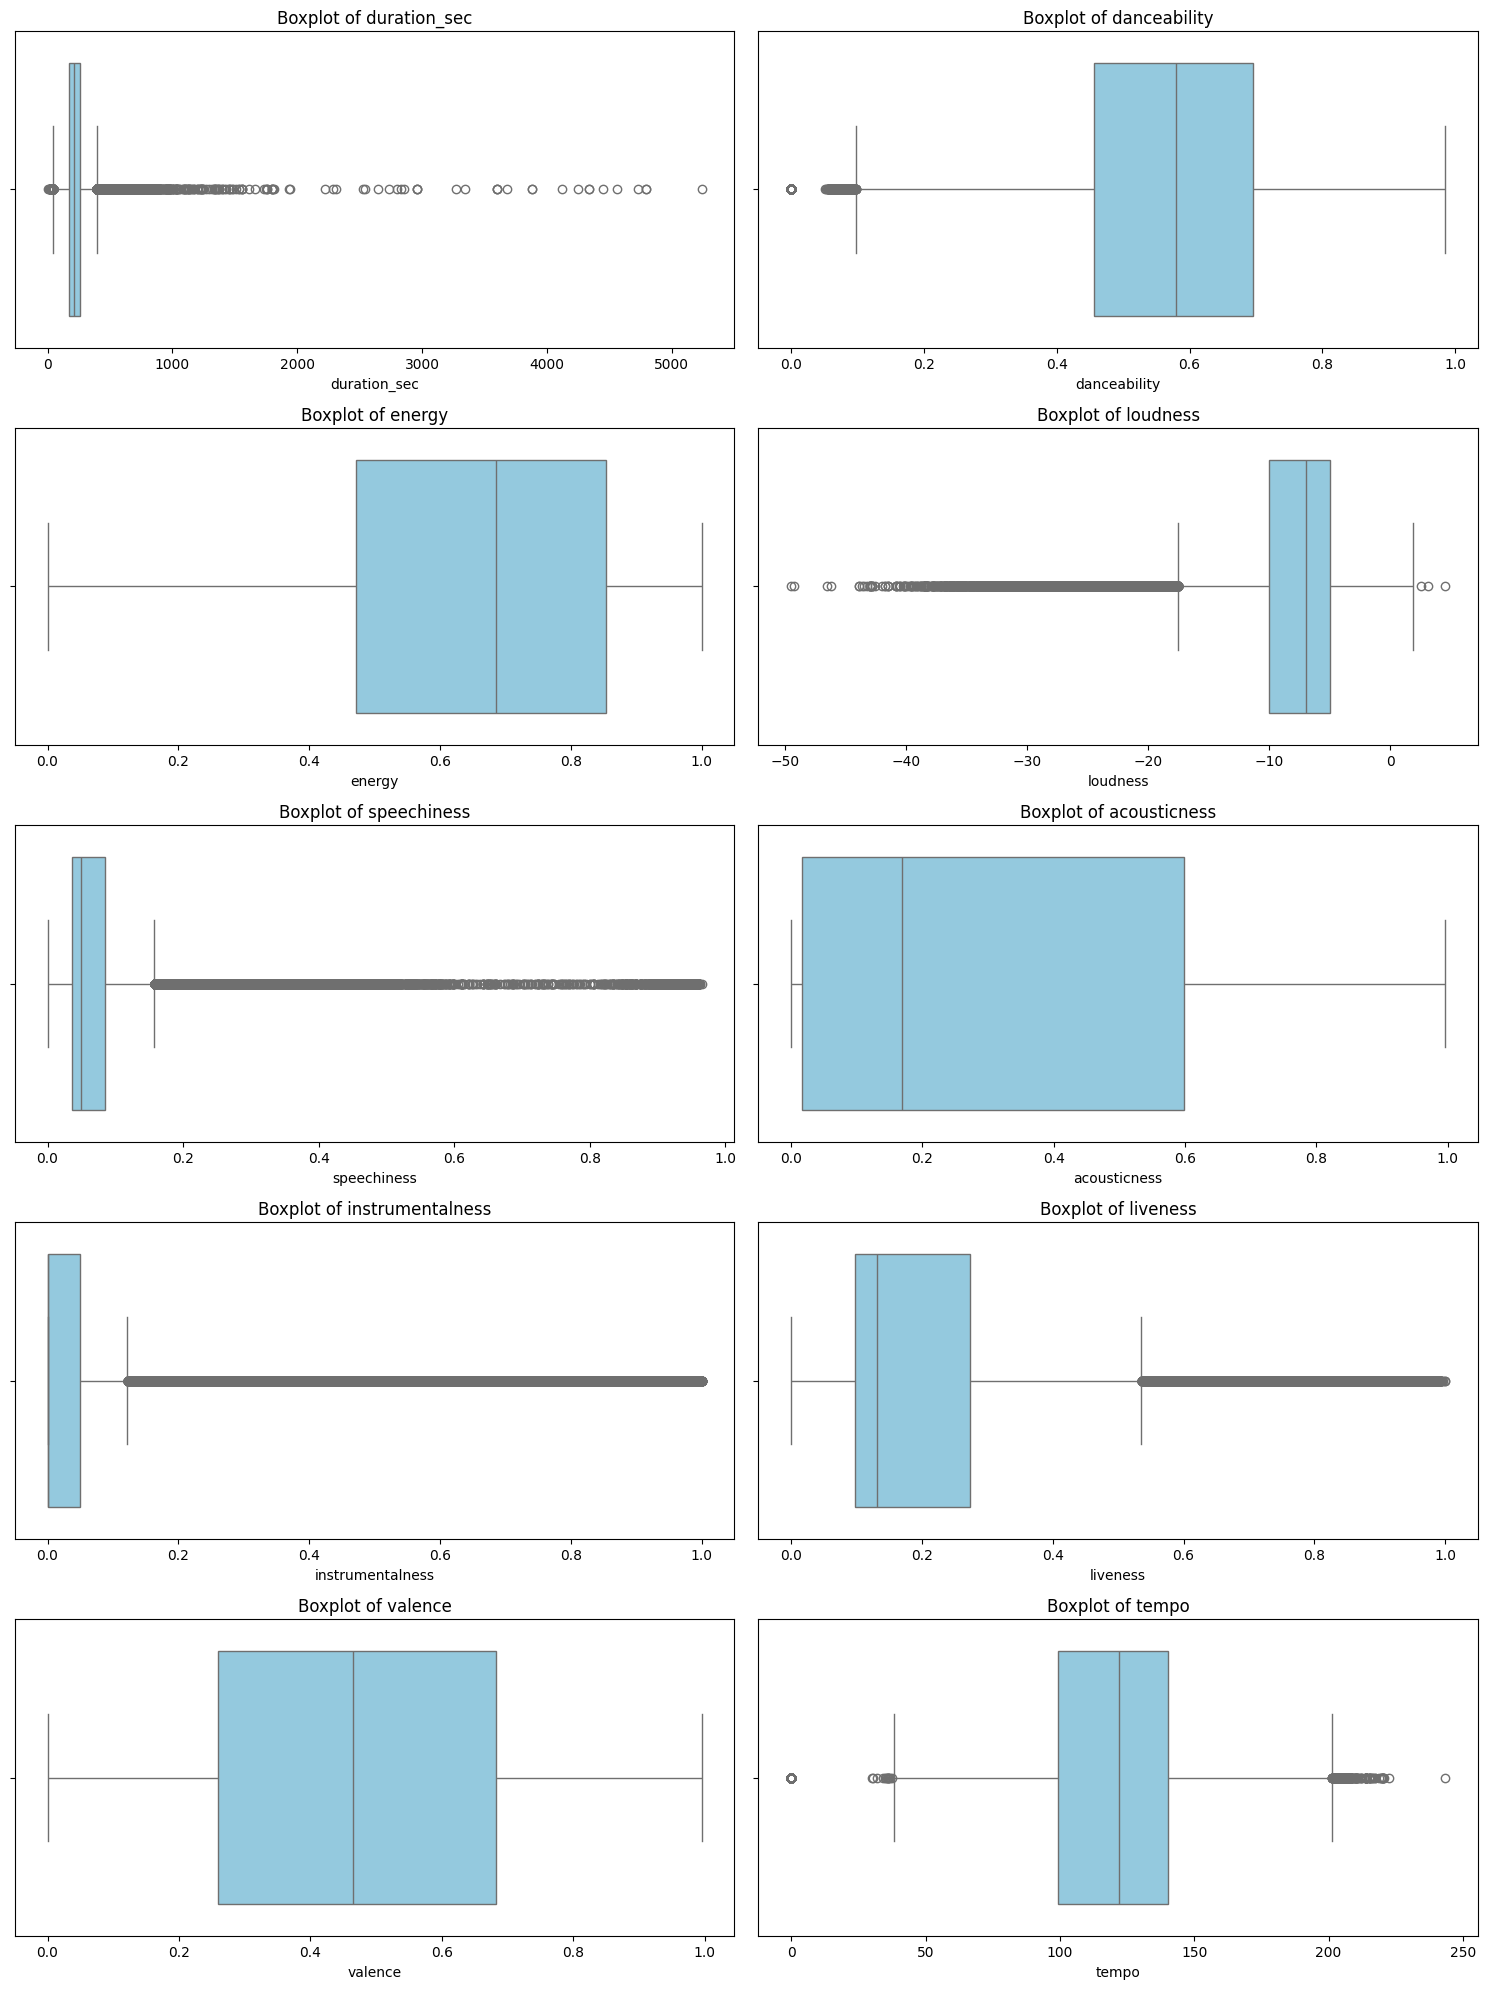

                  Outlier Count
instrumentalness          25246
speechiness               13211
liveness                   8642
loudness                   6173
duration_sec               5618
danceability                620
tempo                       617
energy                        0
acousticness                  0
valence                       0
Regression Metrics on Test Set:
RMSE: 17.259
R²: 0.396
MAE: 12.248


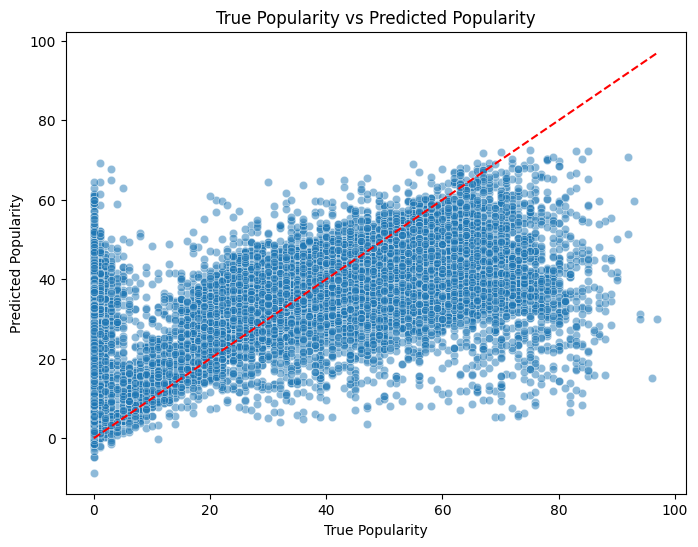

In [ ]:
# Import core data manipulation and visualization libraries
import pandas as pd  # DataFrame operations and CSV handling
import numpy as np  # Numerical computing and array operations
import matplotlib.pyplot as plt  # Base plotting library
import seaborn as sns  # Enhanced visualizations and statistical plots

# Machine learning components from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score, KFold  # Data splitting and cross-validation
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Feature scaling and categorical encoding
from sklearn.compose import ColumnTransformer  # Column-wise transformations
from sklearn.pipeline import Pipeline  # ML workflow automation
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error  # Regression evaluation metrics
from sklearn.impute import SimpleImputer  # Handling missing data

from sklearn.linear_model import LinearRegression  # Baseline linear model
from sklearn.tree import DecisionTreeRegressor  # Tree-based regression
from xgboost import XGBRegressor  # Gradient boosting implementation

# Deep learning components from Keras
from tensorflow.keras.models import Sequential  # Neural network container
from tensorflow.keras.layers import Dense  # Fully connected layers
from tensorflow.keras.optimizers import Adam  # Adaptive learning rate optimizer
from tensorflow.keras.callbacks import EarlyStopping  # Overfitting prevention

# Load dataset from CSV file into pandas DataFrame
df = pd.read_csv('dataset.csv')

# Initial data inspection
df.head()
df.info()
df.isnull().sum()
df.describe()

# Visualize the distribution of the target variable 'popularity'
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

# Correlation analysis
numeric_features = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
corr = df[numeric_features + ['popularity']].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Analyze popularity by binned features
for feature in ['danceability', 'energy', 'loudness', 'tempo']:
    df['binned'] = pd.qcut(df[feature], 10, duplicates='drop')
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='binned', y='popularity', data=df)
    plt.title(f'Popularity by {feature} bins')
    plt.xlabel(f'{feature} bins')
    plt.ylabel('Popularity')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
df.drop(columns='binned', inplace=True)

# Feature Engineering
df['explicit'] = df['explicit'].astype(int)
df['duration_sec'] = df['duration_ms'] / 1000

# Drop non-useful columns
df_model = df.drop(columns=['track_id', 'artists', 'album_name', 'track_name', 'duration_ms'])
print(df_model['track_genre'].value_counts())
df_model.head()

# Prepare features and target
X = df_model.drop('popularity', axis=1)
y = df_model['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify column types
categorical_cols = ['track_genre', 'key', 'mode', 'time_signature']
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing Pipelines
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Linear Regression
model_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression RMSE: {rmse_lr:.2f}")
print(f"Linear Regression R2: {r2_lr:.2f}")

# Decision Tree
model_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Decision Tree R2: {r2_dt:.2f}")

# XGBoost
model_xgb = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, eval_metric='rmse'))
])
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost RMSE: {rmse_xgb:.2f}")
print(f"XGBoost R2: {r2_xgb:.2f}")

# Neural Network preprocessing
X_train_nn = preprocessor.fit_transform(X_train).toarray()
X_test_nn = preprocessor.transform(X_test).toarray()

def build_nn():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_nn.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    return model

nn_model = build_nn()
early_stop = EarlyStopping(monitor='val_loss', patience=5)

history = nn_model.fit(
    X_train_nn, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_pred_nn = nn_model.predict(X_test_nn).flatten()
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)
print(f"Neural Network RMSE: {rmse_nn:.2f}")
print(f"Neural Network R2: {r2_nn:.2f}")

# Cross-validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)

def cv_rmse(model, X, y):
    scores = -cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kf)
    return scores.mean()

print("Cross-validated RMSE scores:")
print(f"Linear Regression: {cv_rmse(model_lr, X, y):.2f}")
print(f"Decision Tree: {cv_rmse(model_dt, X, y):.2f}")
print(f"XGBoost: {cv_rmse(model_xgb, X, y):.2f}")

# Feature Importances from XGBoost
ohe_features = model_xgb.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names_out(categorical_cols)
all_features = numeric_cols + list(ohe_features)
importances = model_xgb.named_steps['regressor'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feat_imp[:15], y=feat_imp.index[:15])
plt.title('Top 15 Feature Importances - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

important_numeric = ['duration_sec', 'danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(15, 20))
for i, col in enumerate(important_numeric):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    outliers = series[(series < Q1 - 1.5 * IQR) | (series > Q3 + 1.5 * IQR)]
    return len(outliers)

outlier_summary = {col: count_outliers(df[col]) for col in important_numeric}
outlier_df = pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])
print(outlier_df.sort_values(by='Outlier Count', ascending=False))


# Final evaluation on test set using best model (XGBoost)
y_pred = model_xgb.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Regression Metrics on Test Set:")
print(f"RMSE: {rmse:.3f}")
print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('True Popularity vs Predicted Popularity')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.show()